In [1]:
import math

def entropy(probabilities):
    return -sum(p * math.log2(p) if p > 0 else 0 for p in probabilities)

def information_gain(data, attribute_index, target_index):
    total_instances = len(data)
    target_values = set(data[i][target_index] for i in range(total_instances))
    target_probabilities = [sum(1 for row in data if row[target_index] == value) / total_instances for value in target_values]
    entropy_before = entropy(target_probabilities)
    
    attribute_values = set(data[i][attribute_index] for i in range(total_instances))
    weighted_entropy_after = 0
    
    for value in attribute_values:
        subset = [row for row in data if row[attribute_index] == value]
        subset_size = len(subset)
        subset_target_probabilities = [sum(1 for row in subset if row[target_index] == target_value) / subset_size for target_value in target_values]
        weighted_entropy_after += (subset_size / total_instances) * entropy(subset_target_probabilities)
    
    information_gain = entropy_before - weighted_entropy_after
    return information_gain

data = [
    ["<=30", "high", "no", "fair", "no"],
    ["<=30", "high", "no", "excellent", "no"],
    ["31…40", "high", "no", "fair", "yes"],
    [">40", "medium", "no", "fair", "yes"],
    [">40", "low", "yes", "fair", "yes"],
    [">40", "low", "yes", "excellent", "no"],
    ["31…40", "low", "yes", "excellent", "yes"],
    ["<=30", "medium", "no", "fair", "no"],
    ["<=30", "low", "yes", "fair", "yes"],
    [">40", "medium", "yes", "fair", "yes"],
    ["<=30", "medium", "yes", "excellent", "yes"],
    ["31…40", "medium", "no", "excellent", "yes"],
    ["31…40", "high", "yes", "fair", "yes"],
    [">40", "medium", "no", "excellent", "no"]
]

target_index = 4
attributes = ["age", "income", "student", "credit_rating"]

information_gains = {}
for attribute_index, attribute in enumerate(attributes):
    gain = information_gain(data, attribute_index, target_index)
    information_gains[attribute] = gain

root_attribute = max(information_gains, key=information_gains.get)
root_information_gain = information_gains[root_attribute]

print(f"The root node is '{root_attribute}' with Information Gain of {root_information_gain:.3f}")

The root node is 'age' with Information Gain of 0.247


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = [
    ["<=30", "high", "no", "fair", "no"],
    ["<=30", "high", "no", "excellent", "no"],
    ["31…40", "high", "no", "fair", "yes"],
    [">40", "medium", "no", "fair", "yes"],
    [">40", "low", "yes", "fair", "yes"],
    [">40", "low", "yes", "excellent", "no"],
    ["31…40", "low", "yes", "excellent", "yes"],
    ["<=30", "medium", "no", "fair", "no"],
    ["<=30", "low", "yes", "fair", "yes"],
    [">40", "medium", "yes", "fair", "yes"],
    ["<=30", "medium", "yes", "excellent", "yes"],
    ["31…40", "medium", "no", "excellent", "yes"],
    ["31…40", "high", "yes", "fair", "yes"],
    [">40", "medium", "no", "excellent", "no"]
]

columns = ["age", "income", "student", "credit_rating", "buys_computer"]

df = pd.DataFrame(data, columns=columns)

X = df.drop("buys_computer", axis=1)
y = df["buys_computer"]

categorical_features = ["age", "income", "student", "credit_rating"]
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), categorical_features)],
    remainder="passthrough"
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier())
])

pipeline.fit(X, y)

tree_depth = pipeline.named_steps["classifier"].get_depth()

print(f"Tree depth: {tree_depth}")

Tree depth: 4


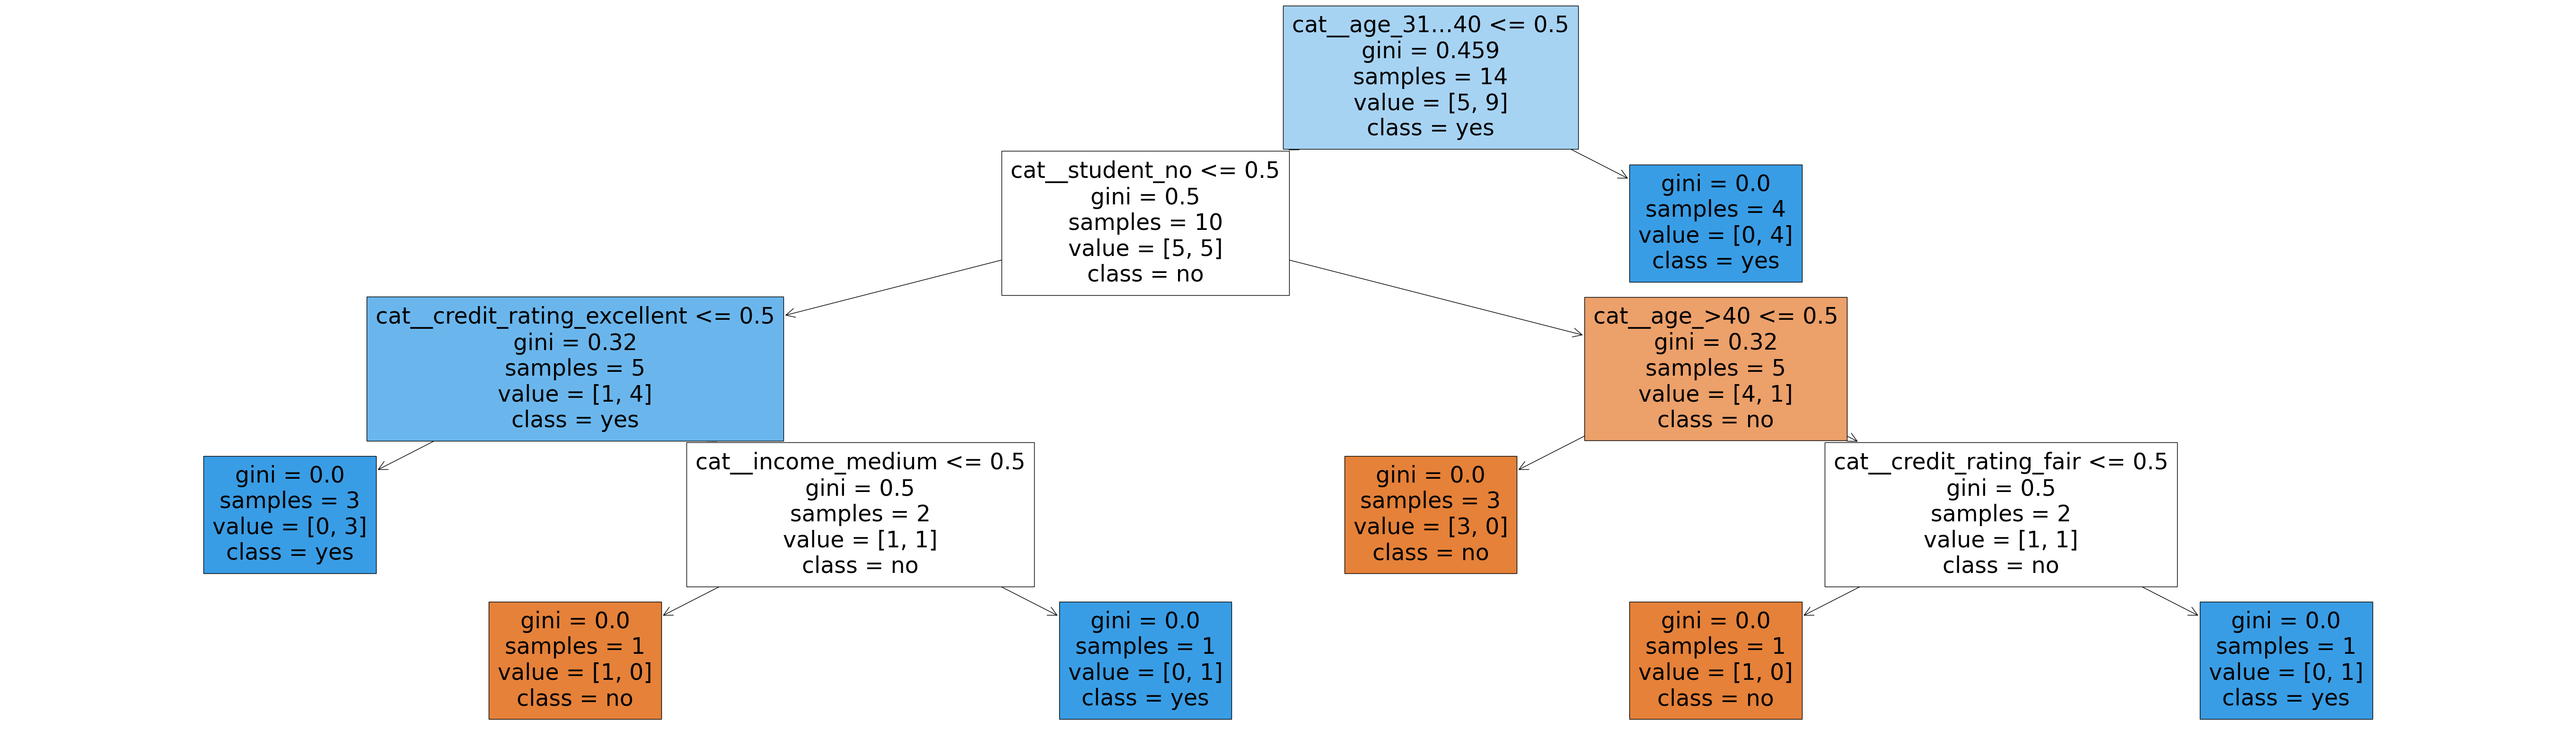

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = [
    ["<=30", "high", "no", "fair", "no"],
    ["<=30", "high", "no", "excellent", "no"],
    ["31…40", "high", "no", "fair", "yes"],
    [">40", "medium", "no", "fair", "yes"],
    [">40", "low", "yes", "fair", "yes"],
    [">40", "low", "yes", "excellent", "no"],
    ["31…40", "low", "yes", "excellent", "yes"],
    ["<=30", "medium", "no", "fair", "no"],
    ["<=30", "low", "yes", "fair", "yes"],
    [">40", "medium", "yes", "fair", "yes"],
    ["<=30", "medium", "yes", "excellent", "yes"],
    ["31…40", "medium", "no", "excellent", "yes"],
    ["31…40", "high", "yes", "fair", "yes"],
    [">40", "medium", "no", "excellent", "no"]
]

columns = ["age", "income", "student", "credit_rating", "buys_computer"]

df = pd.DataFrame(data, columns=columns)

X = df.drop("buys_computer", axis=1)
y = df["buys_computer"]

categorical_features = ["age", "income", "student", "credit_rating"]
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), categorical_features)],
    remainder="passthrough"
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier())
])

pipeline.fit(X, y)

feature_names = list(pipeline.named_steps["preprocessor"].get_feature_names_out(input_features=categorical_features)) + list(X.columns.drop(categorical_features))

plt.figure(figsize=(70, 20))
plot_tree(pipeline.named_steps["classifier"], filled=True, feature_names=feature_names, class_names=['no', 'yes'])
plt.show()

Training Set Accuracy: 1.0
Test Set Accuracy: 1.0


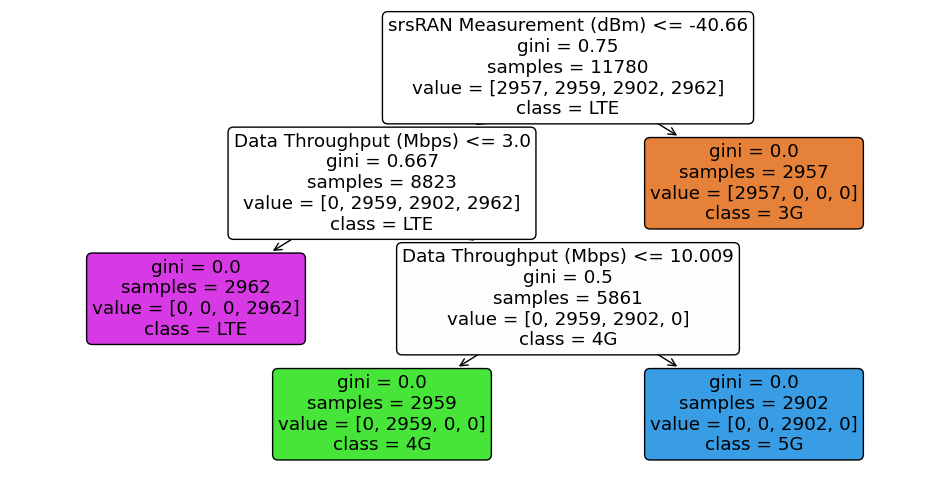

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the data (Replace with your actual path)
data_path = 'C:\\Users\\adity\\Downloads\\signal_metrics.csv'
data = pd.read_csv('C:\\Users\\adity\\Downloads\\signal_metrics.csv')

# Preprocess the data
X = data.drop(columns=['Timestamp', 'Locality', 'Network Type'])

# Convert 'Network Type' to numeric values if it's categorical
encoder = LabelEncoder()
y = encoder.fit_transform(data['Network Type'])

# Handle any missing values (Filling with mean for simplicity)
X.fillna(X.mean(), inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluate and print the model's accuracy
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

# Visualize the trained Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns.tolist(), class_names=[str(cls) for cls in encoder.classes_], filled=True, rounded=True)
plt.show()


Training Set Accuracy with max_depth=5: 1.0
Test Set Accuracy with max_depth=5: 1.0


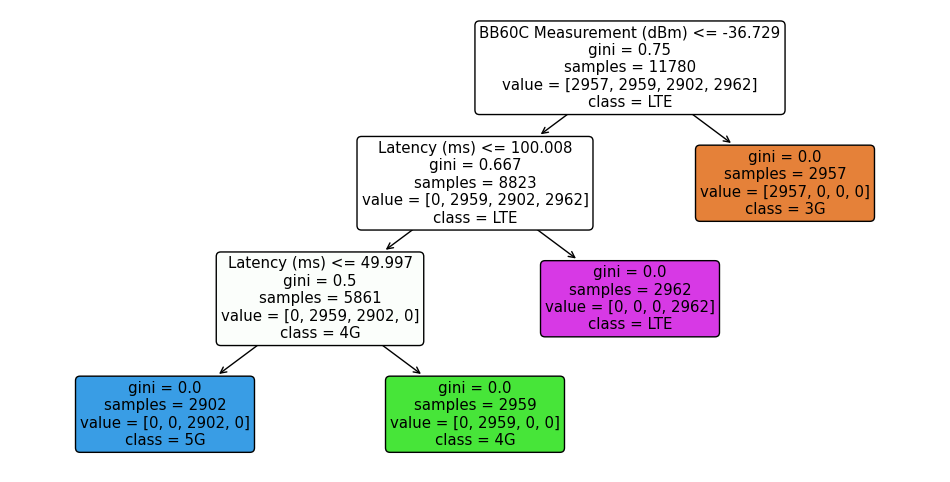

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the data (Replace with your actual path)
data_path = 'C:\\Users\\adity\\Downloads\\signal_metrics.csv'
data = pd.read_csv('C:\\Users\\adity\\Downloads\\signal_metrics.csv')

# Preprocess the data
X = data.drop(columns=['Timestamp', 'Locality', 'Network Type'])

# Convert 'Network Type' to numeric values if it's categorical
encoder = LabelEncoder()
y = encoder.fit_transform(data['Network Type'])

# Handle any missing values (Filling with mean for simplicity)
X.fillna(X.mean(), inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier with max_depth constraint
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

# Evaluate and print the model's accuracy
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Training Set Accuracy with max_depth=5:", train_accuracy)
print("Test Set Accuracy with max_depth=5:", test_accuracy)

# Visualize the trained Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns.tolist(), class_names=[str(cls) for cls in encoder.classes_], filled=True, rounded=True)
plt.show()


Training Set Accuracy with Gini: 1.0
Test Set Accuracy with Gini: 1.0

Training Set Accuracy with Entropy: 1.0
Test Set Accuracy with Entropy: 1.0


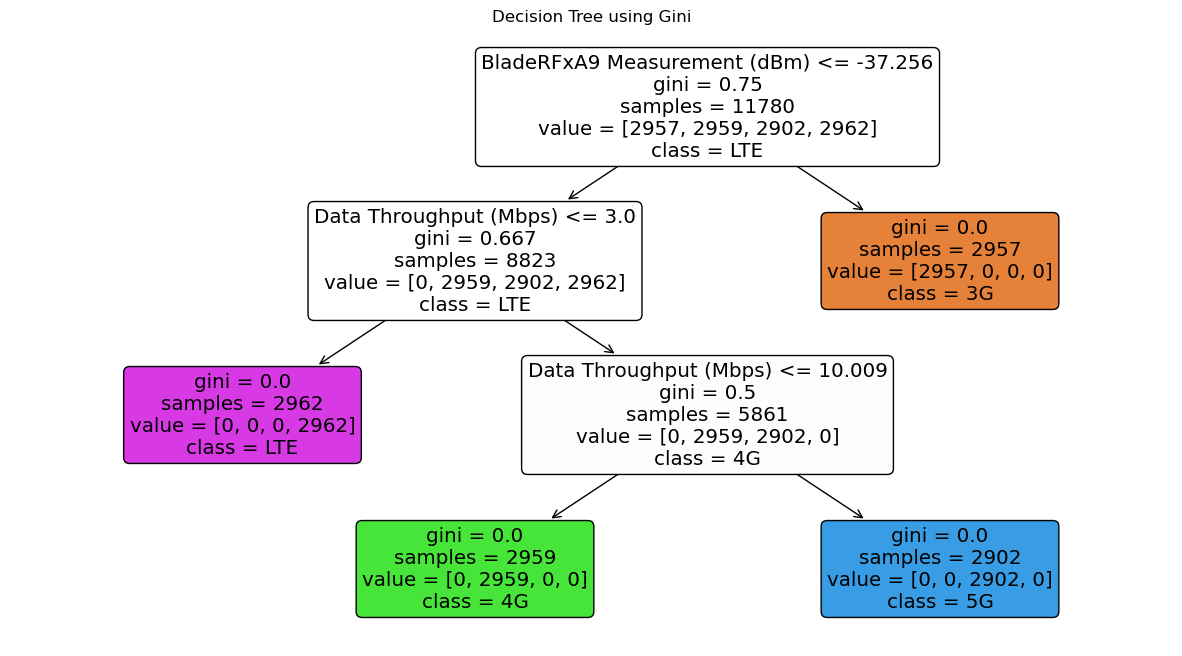

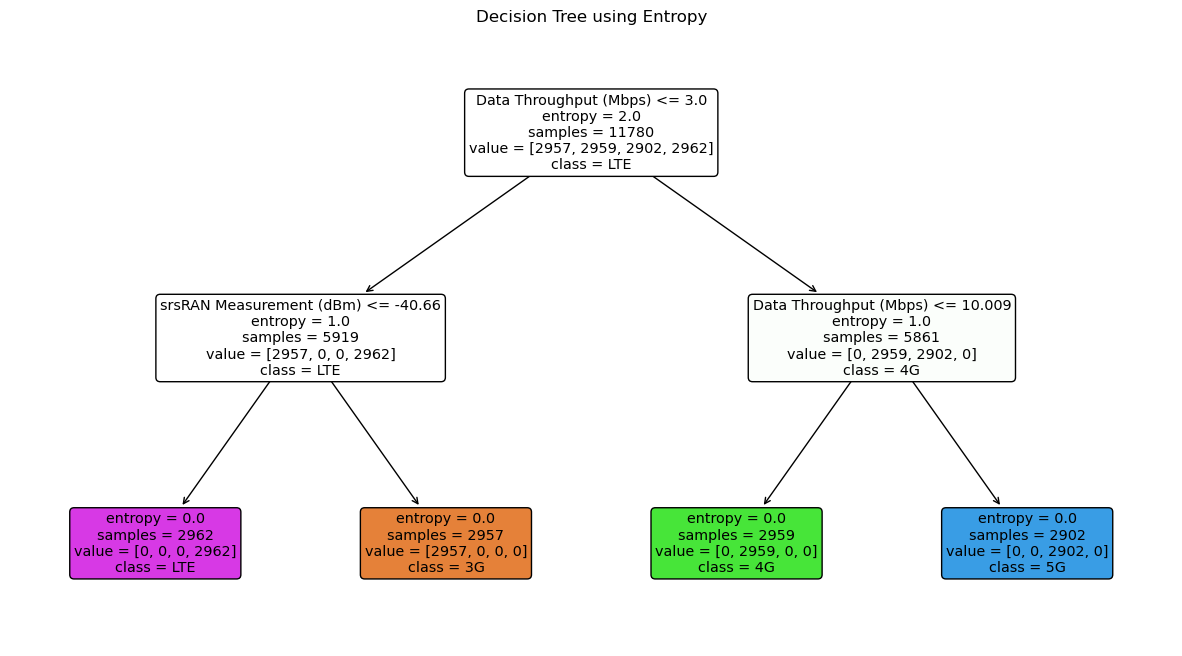

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your dataset from your CSV file
data_path = 'C:\\Users\\adity\\Downloads\\signal_metrics.csv'
data = pd.read_csv('C:\\Users\\adity\\Downloads\\signal_metrics.csv')

# Preprocess the data
X = data[['Latitude', 'Longitude', 'Signal Strength (dBm)', 'Signal Quality (%)', 'Data Throughput (Mbps)', 
          'Latency (ms)', 'BB60C Measurement (dBm)', 'srsRAN Measurement (dBm)', 'BladeRFxA9 Measurement (dBm)']]
encoder = LabelEncoder()
y = encoder.fit_transform(data['Network Type'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier with default "gini" criterion
model_gini = DecisionTreeClassifier(max_depth=5)
model_gini.fit(X_train, y_train)
train_accuracy_gini = model_gini.score(X_train, y_train)
test_accuracy_gini = model_gini.score(X_test, y_test)
print("Training Set Accuracy with Gini:", train_accuracy_gini)
print("Test Set Accuracy with Gini:", test_accuracy_gini)

# Train a Decision Tree Classifier with "entropy" criterion
model_entropy = DecisionTreeClassifier(max_depth=5, criterion="entropy")
model_entropy.fit(X_train, y_train)
train_accuracy_entropy = model_entropy.score(X_train, y_train)
test_accuracy_entropy = model_entropy.score(X_test, y_test)
print("\nTraining Set Accuracy with Entropy:", train_accuracy_entropy)
print("Test Set Accuracy with Entropy:", test_accuracy_entropy)

# Visualize the Decision Trees
# Gini
plt.figure(figsize=(15, 8))
plot_tree(model_gini, feature_names=X.columns.tolist(), class_names=[str(cls) for cls in encoder.classes_], filled=True, rounded=True)
plt.title("Decision Tree using Gini")
plt.show()

# Entropy
plt.figure(figsize=(15, 8))
plot_tree(model_entropy, feature_names=X.columns.tolist(), class_names=[str(cls) for cls in encoder.classes_], filled=True, rounded=True)
plt.title("Decision Tree using Entropy")
plt.show()


In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
data_path = 'C:\\Users\\adity\\Downloads\\signal_metrics.csv'
data = pd.read_csv('C:\\Users\\adity\\Downloads\\signal_metrics.csv')

X = data[['Latitude', 'Longitude', 'Signal Strength (dBm)', 'Signal Quality (%)', 'Data Throughput (Mbps)', 
          'Latency (ms)', 'BB60C Measurement (dBm)', 'srsRAN Measurement (dBm)', 'BladeRFxA9 Measurement (dBm)']]
encoder = LabelEncoder()
y = encoder.fit_transform(data['Network Type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)
dt_train_acc = dt_model.score(X_train, y_train)
dt_test_acc = dt_model.score(X_test, y_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5)
rf_model.fit(X_train, y_train)
rf_train_acc = rf_model.score(X_train, y_train)
rf_test_acc = rf_model.score(X_test, y_test)

print("Decision Tree - Training accuracy:", dt_train_acc)
print("Decision Tree - Test accuracy:", dt_test_acc)

print("\nRandom Forest - Training accuracy:", rf_train_acc)
print("Random Forest - Test accuracy:", rf_test_acc)

Decision Tree - Training accuracy: 1.0
Decision Tree - Test accuracy: 1.0

Random Forest - Training accuracy: 1.0
Random Forest - Test accuracy: 1.0


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset
# ... (same dataset loading and preprocessing code as before)

# Prepare your data
X = data.drop(columns=['Network Type'])  # Features
y = data['Network Type']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Decision Tree classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Create and train a Random Forest classifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Make predictions with both models
decision_tree_predictions = decision_tree_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

# Evaluate Decision Tree Classifier
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, decision_tree_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, decision_tree_predictions))
print("Classification Report:")
print(classification_report(y_test, decision_tree_predictions))

# Evaluate Random Forest Classifier
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, random_forest_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, random_forest_predictions))
print("Classification Report:")
print(classification_report(y_test, random_forest_predictions))

NameError: name 'data' is not defined